In [1]:
%matplotlib inline
import sys
from IPython.display import display
from pathlib import Path as path
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import matplotlib.gridspec as gridspec
from matplotlib import ticker
from matplotlib.colors import LinearSegmentedColormap, to_rgba, ListedColormap
from matplotlib.colorbar import Colorbar
import hyperspy.api as hs
import seaborn as sns
import xarray as xr
from skimage import io
from skimage.color import lab2rgb

In [2]:
# 画图的初始设置
plt.style.use(r'C:\Users\chengliu\OneDrive - UAB\ICMAB-python\Figure\liuchzzyy.mplstyle')
# display(plt.style.available)

# 颜色设定
sys.path.append(r'C:\Users\chengliu\OneDrive - UAB\ICMAB-Python\Figure')
from colors import tol_cmap, tol_cset
colors = list(tol_cset('vibrant'))
if r'sunset' not in plt.colormaps():
    plt.colormaps.register(tol_cmap('sunset'))
if r'rainbow_PuRd' not in plt.colormaps():
    plt.colormaps.register(tol_cmap('rainbow_PuRd')) # 备用 plasma

# 输出的文件夹
path_out = path(r"C:\Users\chengliu\Desktop\Figure")

#### Figure. sTXM OnsetEnergy

In [3]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
def add_sizebar(ax, size, scale, unit, color):
    asb = AnchoredSizeBar(ax.transData,
                          size/scale,
                          '{} {}'.format(size, unit),
                          loc='lower left',
                          pad=0.1, borderpad=0.5, sep=0.5,
                          frameon=False,
                          color=color,
                         label_top=True)
    scalebar = ax.add_artist(asb)
    return scalebar

def transparent_single_color_cmap(color0, color1):
    """Return a single color matplotlib cmap with the transparency increasing
    linearly from 0 to 1."""
    return LinearSegmentedColormap.from_list("", [to_rgba(color0, 1), to_rgba(color1, 1)])

def index(energy, value):
    return np.argmin(abs(energy-value))

In [4]:
# sTXM 的数据
arctan_mapping_pristine = hs.load(path(r'C:\Users\chengliu\OneDrive - UAB\ICMAB-Data\Zn-Mn\Uno\Result\sTXM\ExSitu\αMnO2\Pristine\αMnO2\2023-MIXSTRAL\E1 Pristine\Results\SecondTrail_ScanMn_night\20230629_E1A_749.7x177.5y_specnorm\3_ps_onset_energy_Mn_L3_a.hspy'))
arctan_mapping_MnOOH = hs.load(path(r'C:\Users\chengliu\OneDrive - UAB\ICMAB-Data\Zn-Mn\Uno\Result\sTXM\ExSitu\αMnO2\Pristine\MnOOH\2023-MIXSTRAL\F8 MnOOH\Results\20230701_F6Mn_245.2x1203.3y_specnorm\3_ps_onset_energy_Mn_L3_a.hspy'))
arctan_mapping_1stDis = hs.load(path(r'C:\Users\chengliu\OneDrive - UAB\ICMAB-Data\Zn-Mn\Uno\Result\sTXM\ExSitu\αMnO2\Charge\1st0.9V\2023-MIXSTRAL\B6 1st0.9V\Results\20230630_B6Mn_632.7x1193.9y_specnorm\3_ps_onset_energy_Mn_L3_a.hspy'))
arctan_mapping_1st1_53V= hs.load(path(r'C:\Users\chengliu\OneDrive - UAB\ICMAB-Data\Zn-Mn\Uno\Result\sTXM\ExSitu\αMnO2\Charge\1st1.53V\2023-MIXSTRAL\F2 1st1.53V\Results\20230630_F2MnB_881.9x731.1y_specnorm\3_ps_onset_energy_Mn_L3_a.hspy'))
arctan_mapping_1st1_63V = hs.load(path(r'C:\Users\chengliu\OneDrive - UAB\ICMAB-Data\Zn-Mn\Uno\Result\sTXM\ExSitu\αMnO2\Charge\1st1.63V\2023-MIXSTRAL\E3 1st1.63V\Results\20230701_E3Mn_515.7x521.1y_specnorm\3_ps_onset_energy_Mn_L3_a.hspy'))
arctan_mapping_1st1_80V = hs.load(path(r'C:\Users\chengliu\OneDrive - UAB\ICMAB-Data\Zn-Mn\Uno\Result\sTXM\ExSitu\αMnO2\Charge\1st1.80V\2023-MIXSTRAL\B2 1st1.80V\Results\20230630_B2Mn_270.2x1228.4y_specnorm\3_ps_onset_energy_Mn_L3_a.hspy'))
arctan_mapping_2nd1_30V = hs.load(path(r'C:\Users\chengliu\OneDrive - UAB\ICMAB-Data\Zn-Mn\Uno\Result\sTXM\ExSitu\αMnO2\Charge\2nd1.30V\2023-MIXSTRAL\F4 2nd1.30V\Results\20230701_F4Mn_868.2x982.9y_specnorm\3_ps_onset_energy_Mn_L3_a.hspy'))
arctan_mapping_2nd0_9V = hs.load(path(r'C:\Users\chengliu\OneDrive - UAB\ICMAB-Data\Zn-Mn\Uno\Result\sTXM\ExSitu\αMnO2\Charge\2nd0.9V\2023-MIXSTRAL\G1 2nd0.9V\Results\20230701_G1Mn_949.2x834.6y_specnorm\3_ps_onset_energy_Mn_L3_a.hspy'))

In [5]:
def small(data):
    np.nan_to_num(data, copy=False, nan=0)
    mask_all_L3 = (data >= 638.5) & (data <= 641.5) 
    data1 = np.where(mask_all_L3, data.data, 638.5)   
    data2 = np.where(mask_all_L3, data.data, np.nan)   
    data_flatten = np.sort(data2.flatten()[~np.isnan(data2.flatten())])
    indices = np.arange(data_flatten.shape[0])  # 获取索引 [0, 1, 2, ..., n-1]
    x = indices / (data_flatten.shape[0] - 1)  # 归一化到 [0, 1]
    s2Darray = np.column_stack((x, data_flatten))
    return data1, s2Darray

In [6]:
arctan_mapping_MnOOH, arctan_mapping_MnOOH_b = small(arctan_mapping_MnOOH)
arctan_mapping_pristine, arctan_mapping_pristine_b = small(arctan_mapping_pristine)
arctan_mapping_1stDis, arctan_mapping_1stDis_b = small(arctan_mapping_1stDis)
arctan_mapping_1st1_53V, arctan_mapping_1st1_53V_b = small(arctan_mapping_1st1_53V)
arctan_mapping_1st1_63V, arctan_mapping_1st1_63V_b = small(arctan_mapping_1st1_63V)
arctan_mapping_1st1_80V, arctan_mapping_1st1_80V_b = small(arctan_mapping_1st1_80V)
arctan_mapping_2nd1_30V, arctan_mapping_2nd1_30V_b = small(arctan_mapping_2nd1_30V)
arctan_mapping_2nd0_9V, arctan_mapping_2nd0_9V_b = small(arctan_mapping_2nd0_9V)

In [ ]:
# 画图
%matplotlib inline
plt.close('all')
fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1], wspace=0.0, hspace=0.0, figure=fig)

# 图 A
subfig = fig.add_subfigure(gs[0, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position([0.0, 0.0, 1.0, 1.0])
ax.set_box_aspect(1.0)
vmin = arctan_mapping_MnOOH.min().min() # arctan_mapping_pristine.min().min(), 0.1
vmax = arctan_mapping_MnOOH.max().max() # arctan_mapping_pristine.max().max(), 0.7

im = ax.imshow(arctan_mapping_MnOOH, vmin=vmin, vmax=vmax, cmap='hot')
scalebar = add_sizebar(ax=ax, size=2, scale=0.013000000268220901, unit='um', color='w')
scalebar.set_bbox_to_anchor([0, 0.03], transform=ax.transAxes)
ax.set_axis_off()
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False,)

cax = subfig.add_subplot()
cax.set_position([1.05, 0.2, 0.08, 0.6])
cbar = subfig.colorbar(mappable=im, cax=cax, ticks=np.linspace(vmin, vmax, 5), location='right', orientation='vertical', format="%.1f")
cbar.ax.set_ylim(vmin, vmax)
cax.tick_params(axis='x', direction='out')

ax.text(0.0, 1.05, r'Ref. MnOOH', transform=ax.transAxes, fontsize=13, va='top', ha='left', fontfamily='Arial', fontweight='bold')

# 图 B
subfig = fig.add_subfigure(gs[0, 1], zorder=0)
ax = subfig.add_subplot()
ax.set_position([0.4, 0.0, 1.0, 1.0])
ax.set_box_aspect(1.0)
vmin = arctan_mapping_pristine.min().min() # arctan_mapping_pristine.min().min(), 0.1
vmax = arctan_mapping_pristine.max().max() # arctan_mapping_pristine.max().max(), 0.7

im = ax.imshow(arctan_mapping_pristine, vmin=vmin, vmax=vmax, cmap='hot')
scalebar = add_sizebar(ax=ax, size=2, scale=0.013000000268220901, unit='um', color='w')
scalebar.set_bbox_to_anchor([0, 0.03], transform=ax.transAxes)
ax.set_axis_off()
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False,)

cax = subfig.add_subplot()
cax.set_position([1.45, 0.2, 0.08, 0.6])
cbar = subfig.colorbar(mappable=im, cax=cax, ticks=np.linspace(vmin, vmax, 5), location='right', orientation='vertical', format="%.1f")
cbar.ax.set_ylim(vmin, vmax)
cax.tick_params(axis='x', direction='out')

ax.text(0.0, 1.05, r'Pristine', transform=ax.transAxes, fontsize=13, va='top', ha='left', fontfamily='Arial', fontweight='bold')

# 图 C
subfig = fig.add_subfigure(gs[0, 2], zorder=0)
ax = subfig.add_subplot()
ax.set_position([0.8, 0, 1.0, 1.0])
ax.set_box_aspect(1.0)

vmin = arctan_mapping_1stDis.min().min() # arctan_mapping_1stDis.min().min(), 0.1
vmax = arctan_mapping_1stDis.max().max() # arctan_mapping_1stDis.max().max(), 0.7

im = ax.imshow(arctan_mapping_1stDis, vmin=vmin, vmax=vmax, cmap='hot')
scalebar = add_sizebar(ax=ax, size=2, scale=0.013000000268220901, unit='um', color='w')
scalebar.set_bbox_to_anchor([0, 0.03], transform=ax.transAxes)
ax.set_axis_off()
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False,)

cax = subfig.add_subplot()
cax.set_position([1.85, 0.2, 0.08, 0.6])
cbar = subfig.colorbar(mappable=im, cax=cax, ticks=np.linspace(vmin, vmax, 5), location='right', orientation='vertical', format="%.1f")
cax.tick_params(axis='x', direction='out')
cbar.ax.set_ylim(vmin, vmax)
ax.text(0.0, 1.05, r'1stDischarge', transform=ax.transAxes, fontsize=13, va='top', ha='left', fontfamily='Arial', fontweight='bold')

# 图 D
subfig = fig.add_subfigure(gs[1, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position([0, 0.15, 1.0, 1.0])
ax.set_box_aspect(1.0)

vmin = arctan_mapping_1st1_53V.min().min() # arctan_mapping_1stDis.min().min(), 0.1
vmax = arctan_mapping_1st1_53V.max().max() # arctan_mapping_1stDis.max().max(), 0.7

im = ax.imshow(arctan_mapping_1st1_53V, vmin=vmin, vmax=vmax, cmap='hot')
scalebar = add_sizebar(ax=ax, size=2, scale=0.013000000268220901, unit='um', color='w')
scalebar.set_bbox_to_anchor([0, 0.03], transform=ax.transAxes)
ax.set_axis_off()
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False,)

cax = subfig.add_subplot()
cax.set_position([1.05, 0.35, 0.08, 0.6])
cbar = subfig.colorbar(mappable=im, cax=cax, ticks=np.linspace(vmin, vmax, 5), location='right', orientation='vertical', format="%.1f")
cax.tick_params(axis='x', direction='out')
cbar.ax.set_ylim(vmin, vmax)
ax.text(0.0, 1.05, r'1stHalfCharge#1', transform=ax.transAxes, fontsize=13, va='top', ha='left', fontfamily='Arial', fontweight='bold')

# 图 E
subfig = fig.add_subfigure(gs[1, 1], zorder=0)
ax = subfig.add_subplot()
ax.set_position([0.4, 0.15, 1.0, 1.0])
ax.set_box_aspect(1.0)

vmin = arctan_mapping_1st1_63V.min().min() # arctan_mapping_1stDis.min().min(), 0.1
vmax = arctan_mapping_1st1_63V.max().max() # arctan_mapping_1stDis.max().max(), 0.7

im = ax.imshow(arctan_mapping_1st1_63V, vmin=vmin, vmax=vmax, cmap='hot')
scalebar = add_sizebar(ax=ax, size=2, scale=0.013000000268220901, unit='um', color='w')
scalebar.set_bbox_to_anchor([0, 0.03], transform=ax.transAxes)
ax.set_axis_off()
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False,)

cax = subfig.add_subplot()
cax.set_position([1.45, 0.35, 0.08, 0.6])
cbar = subfig.colorbar(mappable=im, cax=cax, ticks=np.linspace(vmin, vmax, 5), location='right', orientation='vertical', format="%.1f")
cax.tick_params(axis='x', direction='out')
cbar.ax.set_ylim(vmin, vmax)
ax.text(0.0, 1.05, r'1stHalfCharge#2', transform=ax.transAxes, fontsize=13, va='top', ha='left', fontfamily='Arial', fontweight='bold')

# 图 F
subfig = fig.add_subfigure(gs[1, 2], zorder=0)
ax = subfig.add_subplot()
ax.set_position([0.8, 0.15, 1.0, 1.0])
ax.set_box_aspect(1.0)

vmin = arctan_mapping_1st1_80V.min().min() # arctan_mapping_1stDis.min().min(), 0.1
vmax = arctan_mapping_1st1_80V.max().max() # arctan_mapping_1stDis.max().max(), 0.7

im = ax.imshow(arctan_mapping_1st1_80V, vmin=vmin, vmax=vmax, cmap='hot')
scalebar = add_sizebar(ax=ax, size=2, scale=0.013000000268220901, unit='um', color='w')
scalebar.set_bbox_to_anchor([0, 0.03], transform=ax.transAxes)
ax.set_axis_off()
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False,)

cax = subfig.add_subplot()
cax.set_position([1.85, 0.35, 0.08, 0.6])
cbar = subfig.colorbar(mappable=im, cax=cax, ticks=np.linspace(vmin, vmax, 5), location='right', orientation='vertical', format="%.1f")
cax.tick_params(axis='x', direction='out')
cbar.ax.set_ylim(vmin, vmax)
ax.text(0.0, 1.05, r'1stFullCharge', transform=ax.transAxes, fontsize=13, va='top', ha='left', fontfamily='Arial', fontweight='bold')

# 图 G
subfig = fig.add_subfigure(gs[2, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position([0, 0.3, 1.0, 1.0])
ax.set_box_aspect(1.0)

vmin = arctan_mapping_2nd1_30V.min().min() # arctan_mapping_1stDis.min().min(), 0.1
vmax = arctan_mapping_2nd1_30V.max().max() # arctan_mapping_1stDis.max().max(), 0.7

im = ax.imshow(arctan_mapping_2nd1_30V, vmin=vmin, vmax=vmax, cmap='hot')
scalebar = add_sizebar(ax=ax, size=2, scale=0.013000000268220901, unit='um', color='w')
scalebar.set_bbox_to_anchor([0, 0.03], transform=ax.transAxes)
ax.set_axis_off()
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False,)

cax = subfig.add_subplot()
cax.set_position([1.05, 0.5, 0.08, 0.6])
cbar = subfig.colorbar(mappable=im, cax=cax, ticks=np.linspace(vmin, vmax, 5), location='right', orientation='vertical', format="%.1f")
cax.tick_params(axis='x', direction='out')
cbar.ax.set_ylim(vmin, vmax)
ax.text(0.0, 1.05, r'2ndHalfDischarge', transform=ax.transAxes, fontsize=13, va='top', ha='left', fontfamily='Arial', fontweight='bold')

# 图 H
subfig = fig.add_subfigure(gs[2, 1], zorder=0)
ax = subfig.add_subplot()
ax.set_position([0.4, 0.3, 1.0, 1.0])
ax.set_box_aspect(1.0)

vmin = arctan_mapping_2nd0_9V.min().min() # arctan_mapping_1stDis.min().min(), 0.1
vmax = arctan_mapping_2nd0_9V.max().max() # arctan_mapping_1stDis.max().max(), 0.7

im = ax.imshow(arctan_mapping_2nd0_9V, vmin=vmin, vmax=vmax, cmap='hot')
scalebar = add_sizebar(ax=ax, size=2, scale=0.013000000268220901, unit='um', color='w')
scalebar.set_bbox_to_anchor([0, 0.03], transform=ax.transAxes)
ax.set_axis_off()
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False,)

cax = subfig.add_subplot()
cax.set_position([1.45, 0.5, 0.08, 0.6])
cbar = subfig.colorbar(mappable=im, cax=cax, ticks=np.linspace(vmin, vmax, 5), location='right', orientation='vertical', format="%.1f")
cax.tick_params(axis='x', direction='out')
cbar.ax.set_ylim(vmin, vmax)
ax.text(0.0, 1.05, r'2ndFullDischarge', transform=ax.transAxes, fontsize=13, va='top', ha='left', fontfamily='Arial', fontweight='bold')


# # 图 I
# subfig = fig.add_subfigure(gs[2, 2], zorder=0)
# ax = subfig.add_subplot()
# ax.set_position([0.9, 0.25, 1.0, 1.0])
# ax.set_box_aspect(0.8)
# offset = 0.0
# cmap = mpl.colormaps['tab10']
# ax.hist(arctan_mapping_pristine_b.flatten(), bins=30, density=True, color=cmap.colors[0], align='mid', range=(vmin, vmax), label=r'Pristine', stacked=True,) 
# ax.hist(arctan_mapping_1stDis_b.flatten(), bottom=offset, bins=30, density=True, color=cmap.colors[1], align='mid', range=(vmin, vmax), label=r'1stDischarge', alpha=1, stacked=True,)
# ax.hist(arctan_mapping_1st1_53V_b.flatten(), bottom=2*offset, bins=30, density=True, color=cmap.colors[2], align='mid', range=(vmin, vmax), label=r'1stHalfCharge#1', alpha=1, stacked=True,) 
# ax.hist(arctan_mapping_1st1_63V_b.flatten(), bottom=3*offset, bins=30, density=True, color=cmap.colors[3], align='mid', range=(vmin, vmax), label=r'1stHalfCharge#2', alpha=1, stacked=True) 
# ax.hist(arctan_mapping_1st1_80V_b.flatten(), bottom=4*offset, bins=30, density=True, color=cmap.colors[4], align='mid', range=(vmin, vmax), label=r'1stFullCharge', alpha=1, stacked=True) 
# ax.hist(arctan_mapping_2nd1_30V_b.flatten(), bottom=5*offset, bins=30, density=True, color=cmap.colors[5], align='mid', range=(vmin, vmax), label=r'2ndHalfDischarge', alpha=1, stacked=True) 
# ax.hist(arctan_mapping_2nd0_9V_b.flatten(), bottom=6*offset, bins=30, density=True, color=cmap.colors[6], align='mid', range=(vmin, vmax), label=r'2ndFullDischarge', alpha=1, stacked=True) 
# ax.hist(arctan_mapping_MnOOH_b.flatten(), bins=30, density=True, color=cmap.colors[7], align='mid', range=(vmin, vmax), label=r'ref.MnOOH', alpha=1, stacked=True) 

# ax.set_ylabel(r'Normalized Frequency', fontsize=11)
# # ax.set_ylim(0, 2.0)
# # ax.yaxis.set_major_locator(ticker.MultipleLocator(base=2, offset=0))
# # ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=1, offset=0))

# ax.set_xlabel(r'Onset Energy (eV)', fontsize=11,)
# ax.set_xlim(638.5, 641.5)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(base=1, offset=0))
# ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=0.5, offset=0))

# ax.tick_params(axis='both', which='both', left=True, bottom=True, labelbottom=True, labelleft=True,)
# ax.legend(loc='upper left', bbox_to_anchor=(-0.05, 1.3), ncols=3, frameon=False, labelcolor='linecolor', fontsize=9, handletextpad=0.3, labelspacing=0.3)
# # ax.annotate(" ", xy=(0.43, 0.64), xycoords='axes fraction',xytext=(0.36, 0.97), textcoords='axes fraction', size=8, va="center", ha="center",  arrowprops=dict(arrowstyle="->", ls='--', color='k',connectionstyle="arc3,rad=0.1"))


# 图 I
subfig = fig.add_subfigure(gs[2, 2], zorder=0)
ax = subfig.add_subplot()
ax.set_position([1.05, 0.25, 1.0, 1.0])
ax.set_box_aspect(0.8)

cmap = mpl.colormaps['tab10']
ax.plot(arctan_mapping_pristine_b[:,0], arctan_mapping_pristine_b[:,1], color=cmap.colors[0], ls='-', label=r'Pristine', aa=True) 
ax.plot(arctan_mapping_1stDis_b[:,0], arctan_mapping_1stDis_b[:,1], color=cmap.colors[1], ls='-', label=r'1stDischarge', aa=True)
ax.plot(arctan_mapping_1st1_53V_b[:,0], arctan_mapping_1st1_53V_b[:,1], color=cmap.colors[2], ls='-', label=r'1stHalfCharge#1', aa=True) 
ax.plot(arctan_mapping_1st1_63V_b[:,0], arctan_mapping_1st1_63V_b[:,1], color=cmap.colors[3], ls='-', label=r'1stHalfCharge#2', aa=True) 
ax.plot(arctan_mapping_1st1_80V_b[:,0], arctan_mapping_1st1_80V_b[:,1], color=cmap.colors[4], ls='-', label=r'1stFullCharge', aa=True) 
ax.plot(arctan_mapping_2nd1_30V_b[:,0], arctan_mapping_2nd1_30V_b[:,1], color=cmap.colors[5], ls='-', label=r'2ndHalfDischarge', aa=True) 
ax.plot(arctan_mapping_2nd0_9V_b[:,0], arctan_mapping_2nd0_9V_b[:,1], color=cmap.colors[6], ls='-', label=r'2ndFullDischarge', aa=True) 
ax.plot(arctan_mapping_MnOOH_b[:,0], arctan_mapping_MnOOH_b[:,1], color=cmap.colors[7], ls='-', label=r'ref.MnOOH', aa=True) 

ax.set_xlabel(r'Normalized Frequency', fontsize=11)
ax.set_xlim(-0.02, 1.02)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=0.2, offset=0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=0.1, offset=0))

ax.set_ylabel(r'Onset Energy (eV)', fontsize=11,)
ax.set_ylim(638, 642)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=1, offset=0))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.5, offset=0))

ax.tick_params(axis='both', which='both', left=True, bottom=True, labelbottom=True, labelleft=True,)
ax.legend(loc='upper left', bbox_to_anchor=(-0.30, 1.35), ncols=3, frameon=False, labelcolor='linecolor', fontsize=9, handletextpad=0.3, labelspacing=0.3)
# ax.annotate(" ", xy=(0.43, 0.64), xycoords='axes fraction',xytext=(0.36, 0.97), textcoords='axes fraction', size=8, va="center", ha="center",  arrowprops=dict(arrowstyle="->", ls='--', color='k',connectionstyle="arc3,rad=0.1"))

plt.savefig(path.joinpath(path_out, r'sTXM_OnsetEnergy_300_V0_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=300, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'sTXM_OnsetEnergy_600_V0_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=600, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'sTXM_OnsetEnergy_900_V0_0.svg'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=900)
plt.show()

#### Figure. sTXM Shape Index Mappings - V1

In [3]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
def add_sizebar(ax, size, px_scale, unit, color):
    """添加比例尺"""
    scalebar = AnchoredSizeBar(
        ax.transData,
        size/px_scale,
        f'{size} {unit}',
        loc='lower left',
        pad=0.1, borderpad=0.5, sep=0.5,
        frameon=False,
        color=color,
        label_top=True
    )
    ax.add_artist(scalebar)
    return scalebar

def transparent_single_color_cmap(color0, color1):
    """Return a single color matplotlib cmap with the transparency increasing
    linearly from 0 to 1."""
    return LinearSegmentedColormap.from_list("", [to_rgba(color0, 1), to_rgba(color1, 1)])

def index(energy, value):
    return np.argmin(abs(energy-value))

def process_data(file_path, low_cut=0.20, high_cut=0.551):
    """数据处理函数"""
    df = pd.read_csv(file_path, sep=',', header=None, comment='#')
    df = df.replace([np.inf, -np.inf], np.nan).fillna(0)
    return df.where((df >= low_cut) & (df <= high_cut), 0)

In [4]:
# sTXM 的数据
DATA_ROOT = path(r"C:\Users\chengliu\OneDrive - UAB\ICMAB-Data\Zn-Mn\Uno\Result\sTXM\ExSitu\αMnO2\Andrea")
PX_SCALE = 0.013000000268220901  # 像素比例尺 (um/px)
CUTOFFS = (0.20, 0.551)

# 定义所有数据集的信息
datasets = [
    ('Pristine', 'Pristine/E1 Pristine/Pristine_Im_ratio2.txt'),
    ('1stDischarge', 'Charge/B6 1st0.9V/B6_Imratio2.txt'),
    ('MnOOH', 'Pristine/F8 MnOOH/MnOOH_Imratio2.txt'),
    ('1stHalfCharge#1', 'Charge/F2 1st1.53V/F2_Im_ratio2.txt'),
    ('1stHalfCharge#2', 'Charge/E3 1st1.63V/E3_Im_ratio2.txt'),
    ('1stFullCharge', 'Charge/B2 1st1.80V/B2_Im_ratio2.txt'),
    ('2ndHalfDischarge', 'Charge/F4 2nd1.30V/F4_Im_ratio2.txt'),
    ('2ndFullDischarge', 'Charge/G1 2nd0.9V/G1_Im_ratio2.txt')
]

# 统一加载和处理数据
data_dict = {name: process_data(DATA_ROOT/path, *CUTOFFS) for name, path in datasets}

In [5]:
def analyze_histogram(df: pd.DataFrame, column: str=None, bins: int = 100):
    """
    对指定列的数据进行直方图分析，找到最大频数的 bin 及相关信息。
    
    :param df: pd.DataFrame, 输入的二维数据
    :param column: str, 要分析的列名
    :param bins: int, 直方图的 bin 数量
    :return: dict, 包含最大频数、bin 中心、bin 边界的信息
    """
    if column:
        if column not in df.columns:
            raise ValueError(f"Column '{column}' not found in DataFrame")
        data = df[[column]].dropna().values.flatten()
        columns_to_analyze = [column]
    else:
        data = df.dropna().values.flatten()  # 一次性获取所有数值数据
        columns_to_analyze = df.columns
    
    # 计算直方图
    hist, bin_edges = np.histogram(data, bins=bins, density=True)
    # 找到最大计数的 bin
    max_idx = np.argmax(hist[1:])
    max_count = hist[max_idx]
    bin_left = bin_edges[max_idx]
    bin_right = bin_edges[max_idx + 1]
    bin_center = (bin_left + bin_right) / 2
    bin_width = bin_right - bin_left

    return {
        "max_count": max_count,
        "bin_center": bin_center,
        "bin_width": bin_width
    }

In [6]:
# 计算每个数据集的直方图
hist_results = {
    name: analyze_histogram(df, bins=100)  # 分析所有列
    for name, df in data_dict.items()
}

hist_plot = {
    'xdata': [],
    'ydata': [],
    'yerr': []
}

for name, result in hist_results.items():
    hist_plot['xdata'].append(name)
    hist_plot['ydata'].append(result['bin_center'])
    hist_plot['yerr'].append(result['bin_width'])

# 如果需要保持原始顺序，建议显式指定数据集顺序：
ordered_datasets = [
    'Pristine', 'MnOOH', '1stDischarge', '1stHalfCharge#1', '1stHalfCharge#2',
    '1stFullCharge', '2ndHalfDischarge', '2ndFullDischarge'
]

hist_plot = {
    'xdata': ordered_datasets,
    'ydata': [hist_results[name]['bin_center'] for name in ordered_datasets],
    'yerr': [hist_results[name]['bin_width'] for name in ordered_datasets]
}
print(hist_results)

{'Pristine': {'max_count': 1.5317114103446536, 'bin_center': 0.2782549062599012, 'bin_width': 0.005509998143760408}, '1stDischarge': {'max_count': 0.5327286344052513, 'bin_center': 0.3278439555045083, 'bin_width': 0.00550998244545392}, 'MnOOH': {'max_count': 0.005405199049288781, 'bin_center': 0.5151508764853056, 'bin_width': 0.005509635042623584}, '1stHalfCharge#1': {'max_count': 0.6904823865453461, 'bin_center': 0.42151241424128627, 'bin_width': 0.005509966199232497}, '1stHalfCharge#2': {'max_count': 1.508279436085358, 'bin_center': 0.4380444370137484, 'bin_width': 0.005509992918411921}, '1stFullCharge': {'max_count': 0.6358237101943551, 'bin_center': 0.4380423514900879, 'bin_width': 0.005509966685409928}, '2ndHalfDischarge': {'max_count': 0.6790235619881846, 'bin_center': 0.42702292668995323, 'bin_width': 0.005509973247612321}, '2ndFullDischarge': {'max_count': 0.5362017324146776, 'bin_center': 0.3553792727740748, 'bin_width': 0.005509756167039914}}


C:\Users\chengliu\AppData\Local\Temp\ipykernel_13828\565384197.py:73: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), ha="right", rotation_mode="anchor")


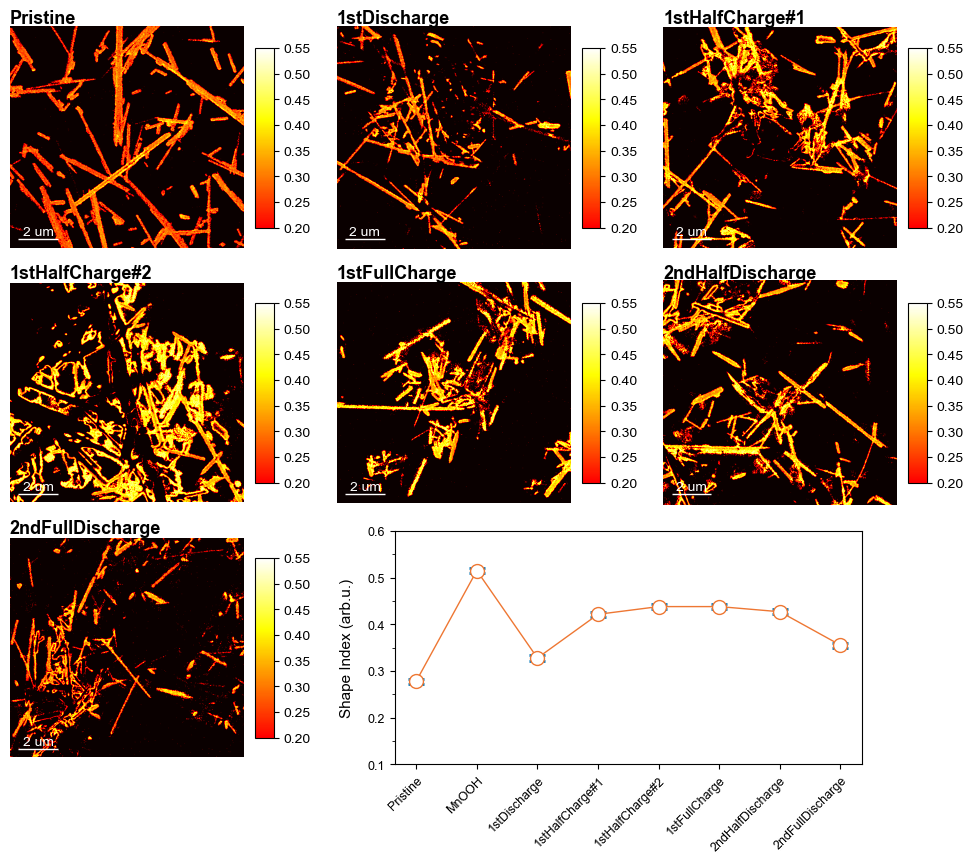

In [15]:
plt.close('all')
fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(3, 3, width_ratios=[1,1,1], height_ratios=[1,1,1], wspace=0.0, hspace=0.0)

# 子图布局参数
subplot_params = [
    # (网格位置，数据键，标题，颜色条位置)
    (gs[0,0], [0.0, 0.0, 1.0, 1.0],'Pristine', 'Pristine', [1.05, 0.2, 0.08, 0.6]),
    (gs[0,1], [0.4, 0, 1.0, 1.0],'1stDischarge', '1stDischarge', [1.45, 0.2, 0.08, 0.6]),
    (gs[0,2], [0.8, 0, 1.0, 1.0],'1stHalfCharge#1', '1stHalfCharge#1', [1.85, 0.2, 0.08, 0.6]),
    (gs[1,0], [0.0, 0.15, 1.0, 1.0],'1stHalfCharge#2', '1stHalfCharge#2', [1.05, 0.35, 0.08, 0.6]),
    (gs[1,1], [0.4, 0.15, 1.0, 1.0],'1stFullCharge', '1stFullCharge', [1.45, 0.35, 0.08, 0.6]),
    (gs[1,2], [0.8, 0.15, 1.0, 1.0],'2ndHalfDischarge', '2ndHalfDischarge', [1.85, 0.35, 0.08, 0.6]),
    (gs[2,0], [0.0, 0.3, 1.0, 1.0],'2ndFullDischarge', '2ndFullDischarge', [1.05, 0.5, 0.08, 0.6]),
]

def create_subplot(subfig_pos, ax_pos, data_key, title, cax_pos):
    """创建标准化子图"""
    subfig = fig.add_subfigure(subfig_pos)
    ax = subfig.add_axes(ax_pos)
    ax.set_box_aspect(1)
    
    data = data_dict[data_key]
    im = ax.imshow(data, vmin=data.min().min(), vmax=data.max().max(), cmap='hot')
    
    # 添加比例尺
    add_sizebar(ax, 2, PX_SCALE, 'um', 'w').set_bbox_to_anchor([0, 0.03], ax.transAxes)
    
    # 添加颜色条
    cax = subfig.add_axes(cax_pos)
    cbar = subfig.colorbar(im, cax=cax, ticks=np.linspace(0, 1, 21), format="%.2f")
    cbar.ax.set_ylim(CUTOFFS[0], data.max().max())
    
    # 添加标题
    ax.text(0, 1.05, title, transform=ax.transAxes, fontsize=13, va='top', fontfamily='Arial', fontweight='bold')
    ax.axis('off')
    return ax

# 批量生成子图A-H
for params in subplot_params:
    create_subplot(*params)

# 图 I
subfig = fig.add_subfigure(gs[2, 1], zorder=0)
ax = subfig.add_subplot()
ax.set_position([0.65, 0.3, 2.0, 1.0])
ax.set_box_aspect(0.5)
cmap = mpl.colormaps['tab10']

# 绘制误差线图
ax.errorbar(
    x=hist_plot['xdata'],    # X轴标签
    y=hist_plot['ydata'],    # Y轴数值
    yerr=hist_plot['yerr'],  # 误差线长度
    fmt='-o',                 # 数据点样式（圆圈）
    color=colors[0],         # 数据点颜色
    ecolor=colors[1],        # 误差线颜色
    elinewidth=1,            # 误差线宽度
    capsize=6,               # 误差线端帽长度
    capthick=2,              # 误差线端帽厚度
    markersize=10,           # 数据点大小
    markerfacecolor='white'  # 数据点填充色
)

# y 轴
ax.set_ylabel('Shape Index (arb.u.)', fontsize=11, labelpad=10)
ax.set_ylim(0.1, 0.6)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.1, offset=0))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.05, offset=0))

# x 轴
ax.tick_params(axis='x', rotation=45, labelsize=10)
ax.set_xticklabels(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

ax.tick_params(axis='both', direction='out', labelsize=9)

plt.savefig(path.joinpath(path_out, r'sTXM_Shape_300_V0_1.tif'), pad_inches=0.05, bbox_inches='tight', dpi=300, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'sTXM_Shape_600_V0_1.tif'), pad_inches=0.05, bbox_inches='tight', dpi=600, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'sTXM_Shape_600_V0_1.pdf'), pad_inches=0.05, bbox_inches='tight', dpi=600, transparent=False)
plt.savefig(path.joinpath(path_out, r'sTXM_Shape_900_V0_1.svg'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=900)
plt.show()

#### Figure. sTXM Shape Index Mappings

In [ ]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
def add_sizebar(ax, size, scale, unit, color):
    asb = AnchoredSizeBar(ax.transData,
                          size/scale,
                          '{} {}'.format(size, unit),
                          loc='lower left',
                          pad=0.1, borderpad=0.5, sep=0.5,
                          frameon=False,
                          color=color,
                         label_top=True)
    scalebar = ax.add_artist(asb)
    return scalebar

def transparent_single_color_cmap(color0, color1):
    """Return a single color matplotlib cmap with the transparency increasing
    linearly from 0 to 1."""
    return LinearSegmentedColormap.from_list("", [to_rgba(color0, 1), to_rgba(color1, 1)])

def index(energy, value):
    return np.argmin(abs(energy-value))

In [ ]:
# sTXM 的数据
path_sTXM_Mn = path(r"C:\Users\chengliu\OneDrive - UAB\ICMAB-Data\Zn-Mn\Uno\Result\sTXM\ExSitu\αMnO2\Andrea\Results")
arctan_mapping_pristine = pd.read_csv(path.joinpath(path_sTXM_Mn, r'Pristine', r'Pristine_Im_ratio2.txt'), sep=',', index_col=None, header=None, comment='#')
arctan_mapping_1stDis = pd.read_csv(path.joinpath(path_sTXM_Mn, r'Charge', r'B6_Imratio2.txt'), sep=',', index_col=None, header=None, comment='#')
arctan_mapping_MnOOH = pd.read_csv(path.joinpath(path_sTXM_Mn, r'Pristine', r'MnOOH_Imratio2.txt'), sep=',', index_col=None, header=None, comment='#')
arctan_mapping_1st1_53V = pd.read_csv(path.joinpath(path_sTXM_Mn, r'Charge', r'F2_Im_ratio2.txt'), sep=',', index_col=None, header=None, comment='#')
arctan_mapping_1st1_63V = pd.read_csv(path.joinpath(path_sTXM_Mn, r'Charge', r'E3_Im_ratio2.txt'), sep=',', index_col=None, header=None, comment='#')
arctan_mapping_1st1_80V = pd.read_csv(path.joinpath(path_sTXM_Mn, r'Charge', r'B2_Im_ratio2.txt'), sep=',', index_col=None, header=None, comment='#')
arctan_mapping_2nd1_30V = pd.read_csv(path.joinpath(path_sTXM_Mn, r'Charge', r'F4_Im_ratio2.txt'), sep=',', index_col=None, header=None, comment='#')
arctan_mapping_2nd0_9V = pd.read_csv(path.joinpath(path_sTXM_Mn, r'Charge', r'G1_Im_ratio2.txt'), sep=',', index_col=None, header=None, comment='#')

In [ ]:
# Echem
path_echem = path(r'C:\Users\chengliu\OneDrive - UAB\ICMAB-Data\Zn-Mn\Uno\Result\Echem\αMnO2\GCD\Results')
echem = pd.read_excel(path.joinpath(path_echem, r'GCD-01C-Zn-1M ZnSO4 + 0.2M MnSO4-αMnO2-1stcycle.xlsx'), sheet_name=0, engine='openpyxl', index_col=None, header=0, comment='#')

In [ ]:
arctan_mapping_MnOOH1 = arctan_mapping_MnOOH.copy(deep=True)
arctan_mapping_pristine1 = arctan_mapping_pristine.copy(deep=True)
arctan_mapping_1stDis1 = arctan_mapping_1stDis.copy(deep=True)
arctan_mapping_1st1_53V1 = arctan_mapping_1st1_53V.copy(deep=True)
arctan_mapping_1st1_63V1 = arctan_mapping_1st1_63V.copy(deep=True)
arctan_mapping_1st1_80V1 = arctan_mapping_1st1_80V.copy(deep=True)
arctan_mapping_2nd1_30V1 = arctan_mapping_2nd1_30V.copy(deep=True)
arctan_mapping_2nd0_9V1 = arctan_mapping_2nd0_9V.copy(deep=True)

In [ ]:
np.nan_to_num(arctan_mapping_pristine, copy=False, nan=0)
np.nan_to_num(arctan_mapping_1stDis, copy=False, nan=0)
np.nan_to_num(arctan_mapping_1st1_53V, copy=False, nan=0)
np.nan_to_num(arctan_mapping_1st1_63V, copy=False, nan=0)
np.nan_to_num(arctan_mapping_1st1_80V, copy=False, nan=0)
np.nan_to_num(arctan_mapping_2nd1_30V, copy=False, nan=0)
np.nan_to_num(arctan_mapping_2nd0_9V, copy=False, nan=0)

low_cut = 0.20
high_cut = 0.551
arctan_mapping_pristine.where(arctan_mapping_pristine<=high_cut, 0, inplace=True)
arctan_mapping_pristine.where(arctan_mapping_pristine>=low_cut, 0, inplace=True)

arctan_mapping_1stDis.where(arctan_mapping_1stDis<=high_cut, 0, inplace=True)
arctan_mapping_1stDis.where(arctan_mapping_1stDis>=low_cut, 0, inplace=True)

arctan_mapping_1st1_53V.where(arctan_mapping_1st1_53V<=high_cut, 0, inplace=True)
arctan_mapping_1st1_53V.where(arctan_mapping_1st1_53V>=low_cut, 0, inplace=True)

arctan_mapping_1st1_63V.where(arctan_mapping_1st1_63V<=high_cut, 0, inplace=True)
arctan_mapping_1st1_63V.where(arctan_mapping_1st1_63V>=low_cut, 0, inplace=True)

arctan_mapping_1st1_80V.where(arctan_mapping_1st1_80V<=high_cut, 0, inplace=True)
arctan_mapping_1st1_80V.where(arctan_mapping_1st1_80V>=low_cut, 0, inplace=True)

arctan_mapping_2nd1_30V.where(arctan_mapping_2nd1_30V<=high_cut, 0, inplace=True)
arctan_mapping_2nd1_30V.where(arctan_mapping_2nd1_30V>=low_cut, 0, inplace=True)

arctan_mapping_2nd0_9V.where(arctan_mapping_2nd0_9V<=high_cut, 0, inplace=True)
arctan_mapping_2nd0_9V.where(arctan_mapping_2nd0_9V>=low_cut, 0, inplace=True)

In [ ]:
# 画图
%matplotlib inline
plt.close('all')
fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1], wspace=0.0, hspace=0.0, figure=fig)

# 图 A
subfig = fig.add_subfigure(gs[0, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position([0.0, 0.0, 1.0, 1.0])
ax.set_box_aspect(1.0)
vmin = arctan_mapping_pristine.min().min() # arctan_mapping_pristine.min().min(), 0.1
vmax = arctan_mapping_pristine.max().max() # arctan_mapping_pristine.max().max(), 0.7

im = ax.imshow(arctan_mapping_pristine, vmin=vmin, vmax=vmax, cmap='hot')
scalebar = add_sizebar(ax=ax, size=2, scale=0.013000000268220901, unit='um', color='w')
scalebar.set_bbox_to_anchor([0, 0.03], transform=ax.transAxes)
ax.set_axis_off()
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False,)

cax = subfig.add_subplot()
cax.set_position([1.05, 0.2, 0.08, 0.6])
cbar = subfig.colorbar(mappable=im, cax=cax, ticks=np.linspace(0, 1, 21), location='right', orientation='vertical', format="%.2f")
cbar.ax.set_ylim(0.20, vmax)
cax.tick_params(axis='x', direction='out')

ax.text(0.0, 1.05, r'Pristine', transform=ax.transAxes, fontsize=13, va='top', ha='left', fontfamily='Arial', fontweight='bold')

# 图 B
subfig = fig.add_subfigure(gs[0, 1], zorder=0)
ax = subfig.add_subplot()
ax.set_position([0.4, 0, 1.0, 1.0])
ax.set_box_aspect(1.0)

vmin = arctan_mapping_1stDis.min().min() # arctan_mapping_1stDis.min().min(), 0.1
vmax = arctan_mapping_1stDis.max().max() # arctan_mapping_1stDis.max().max(), 0.7

im = ax.imshow(arctan_mapping_1stDis, vmin=vmin, vmax=vmax, cmap='hot')
scalebar = add_sizebar(ax=ax, size=2, scale=0.013000000268220901, unit='um', color='w')
scalebar.set_bbox_to_anchor([0, 0.03], transform=ax.transAxes)
ax.set_axis_off()
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False,)

cax = subfig.add_subplot()
cax.set_position([1.45, 0.2, 0.08, 0.6])
cbar = subfig.colorbar(mappable=im, cax=cax, ticks=np.linspace(0, 1, 21), location='right', orientation='vertical', format="%.2f")
cax.tick_params(axis='x', direction='out')
cbar.ax.set_ylim(0.20, vmax)
ax.text(0.0, 1.05, r'1stDischarge', transform=ax.transAxes, fontsize=13, va='top', ha='left', fontfamily='Arial', fontweight='bold')

# 图 C
subfig = fig.add_subfigure(gs[0, 2], zorder=0)
ax = subfig.add_subplot()
ax.set_position([0.8, 0, 1.0, 1.0])
ax.set_box_aspect(1.0)

vmin = arctan_mapping_1st1_53V.min().min() # arctan_mapping_1stDis.min().min(), 0.1
vmax = arctan_mapping_1st1_53V.max().max() # arctan_mapping_1stDis.max().max(), 0.7

im = ax.imshow(arctan_mapping_1st1_53V, vmin=vmin, vmax=vmax, cmap='hot')
scalebar = add_sizebar(ax=ax, size=2, scale=0.013000000268220901, unit='um', color='w')
scalebar.set_bbox_to_anchor([0, 0.03], transform=ax.transAxes)
ax.set_axis_off()
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False,)

cax = subfig.add_subplot()
cax.set_position([1.85, 0.2, 0.08, 0.6])
cbar = subfig.colorbar(mappable=im, cax=cax, ticks=np.linspace(0, 1, 21), location='right', orientation='vertical', format="%.2f")
cax.tick_params(axis='x', direction='out')
cbar.ax.set_ylim(0.20, vmax)
ax.text(0.0, 1.05, r'1stHalfCharge#1', transform=ax.transAxes, fontsize=13, va='top', ha='left', fontfamily='Arial', fontweight='bold')

# 图 D
subfig = fig.add_subfigure(gs[1, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position([0.0, 0.15, 1.0, 1.0])
ax.set_box_aspect(1.0)

vmin = arctan_mapping_1st1_63V.min().min() # arctan_mapping_1stDis.min().min(), 0.1
vmax = arctan_mapping_1st1_63V.max().max() # arctan_mapping_1stDis.max().max(), 0.7

im = ax.imshow(arctan_mapping_1st1_63V, vmin=vmin, vmax=vmax, cmap='hot')
scalebar = add_sizebar(ax=ax, size=2, scale=0.013000000268220901, unit='um', color='w')
scalebar.set_bbox_to_anchor([0, 0.03], transform=ax.transAxes)
ax.set_axis_off()
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False,)

cax = subfig.add_subplot()
cax.set_position([1.05, 0.35, 0.08, 0.6])
cbar = subfig.colorbar(mappable=im, cax=cax, ticks=np.linspace(0, 1, 21), location='right', orientation='vertical', format="%.2f")
cax.tick_params(axis='x', direction='out')
cbar.ax.set_ylim(0.20, vmax)
ax.text(0.0, 1.05, r'1stHalfCharge#2', transform=ax.transAxes, fontsize=13, va='top', ha='left', fontfamily='Arial', fontweight='bold')

# 图 E
subfig = fig.add_subfigure(gs[1, 1], zorder=0)
ax = subfig.add_subplot()
ax.set_position([0.4, 0.15, 1.0, 1.0])
ax.set_box_aspect(1.0)

vmin = arctan_mapping_1st1_80V.min().min() # arctan_mapping_1stDis.min().min(), 0.1
vmax = arctan_mapping_1st1_80V.max().max() # arctan_mapping_1stDis.max().max(), 0.7

im = ax.imshow(arctan_mapping_1st1_80V, vmin=vmin, vmax=vmax, cmap='hot')
scalebar = add_sizebar(ax=ax, size=2, scale=0.013000000268220901, unit='um', color='w')
scalebar.set_bbox_to_anchor([0, 0.03], transform=ax.transAxes)
ax.set_axis_off()
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False,)

cax = subfig.add_subplot()
cax.set_position([1.45, 0.35, 0.08, 0.6])
cbar = subfig.colorbar(mappable=im, cax=cax, ticks=np.linspace(0, 1, 21), location='right', orientation='vertical', format="%.2f")
cax.tick_params(axis='x', direction='out')
cbar.ax.set_ylim(0.20, vmax)
ax.text(0.0, 1.05, r'1stFullCharge', transform=ax.transAxes, fontsize=13, va='top', ha='left', fontfamily='Arial', fontweight='bold')

# 图 G
subfig = fig.add_subfigure(gs[1, 2], zorder=0)
ax = subfig.add_subplot()
ax.set_position([0.8, 0.15, 1.0, 1.0])
ax.set_box_aspect(1.0)

vmin = arctan_mapping_2nd1_30V.min().min() # arctan_mapping_1stDis.min().min(), 0.1
vmax = arctan_mapping_2nd1_30V.max().max() # arctan_mapping_1stDis.max().max(), 0.7

im = ax.imshow(arctan_mapping_2nd1_30V, vmin=vmin, vmax=vmax, cmap='hot')
scalebar = add_sizebar(ax=ax, size=2, scale=0.013000000268220901, unit='um', color='w')
scalebar.set_bbox_to_anchor([0, 0.03], transform=ax.transAxes)
ax.set_axis_off()
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False,)

cax = subfig.add_subplot()
cax.set_position([1.85, 0.35, 0.08, 0.6])
cbar = subfig.colorbar(mappable=im, cax=cax, ticks=np.linspace(0, 1, 21), location='right', orientation='vertical', format="%.2f")
cax.tick_params(axis='x', direction='out')
cbar.ax.set_ylim(0.20, vmax)
ax.text(0.0, 1.05, r'2ndHalfDischarge', transform=ax.transAxes, fontsize=13, va='top', ha='left', fontfamily='Arial', fontweight='bold')

# 图 H
subfig = fig.add_subfigure(gs[2, 0], zorder=0)
ax = subfig.add_subplot()
ax.set_position([0.0, 0.3, 1.0, 1.0])
ax.set_box_aspect(1.0)

vmin = arctan_mapping_2nd0_9V.min().min() # arctan_mapping_1stDis.min().min(), 0.1
vmax = arctan_mapping_2nd0_9V.max().max() # arctan_mapping_1stDis.max().max(), 0.7

im = ax.imshow(arctan_mapping_2nd0_9V, vmin=vmin, vmax=vmax, cmap='hot')
scalebar = add_sizebar(ax=ax, size=2, scale=0.013000000268220901, unit='um', color='w')
scalebar.set_bbox_to_anchor([0, 0.03], transform=ax.transAxes)
ax.set_axis_off()
ax.tick_params(axis='both', which='both', bottom=False, top=False, left=False, labelbottom=False, labelleft=False,)

cax = subfig.add_subplot()
cax.set_position([1.05, 0.5, 0.08, 0.6])
cbar = subfig.colorbar(mappable=im, cax=cax, ticks=np.linspace(0, 1, 21), location='right', orientation='vertical', format="%.2f")
cax.tick_params(axis='x', direction='out')
cbar.ax.set_ylim(0.20, vmax)
ax.text(0.0, 1.05, r'2ndFullDischarge', transform=ax.transAxes, fontsize=13, va='top', ha='left', fontfamily='Arial', fontweight='bold')

# 图 I
subfig = fig.add_subfigure(gs[2, 1], zorder=0)
ax = subfig.add_subplot()
ax.set_position([0.5, 0.25, 1.0, 1.0])
ax.set_box_aspect(0.8)

arctan_mapping_pristine_b = arctan_mapping_pristine1.where(arctan_mapping_pristine1>0.05, np.nan, inplace=False)
arctan_mapping_1stDis_b = arctan_mapping_1stDis1.where(arctan_mapping_1stDis1>0.05, np.nan, inplace=False)
arctan_mapping_1st1_53V_b = arctan_mapping_1st1_53V1.where(arctan_mapping_1st1_53V1>0.05, np.nan, inplace=False)
arctan_mapping_1st1_63V_b = arctan_mapping_1st1_63V1.where(arctan_mapping_1st1_63V1>0.05, np.nan, inplace=False)
arctan_mapping_1st1_80V_b = arctan_mapping_1st1_80V1.where(arctan_mapping_1st1_80V1>0.05, np.nan, inplace=False)
arctan_mapping_2nd1_30V_b = arctan_mapping_2nd1_30V1.where(arctan_mapping_2nd1_30V1>0.05, np.nan, inplace=False)
arctan_mapping_2nd0_9V_b = arctan_mapping_2nd0_9V1.where(arctan_mapping_2nd0_9V1>0.05, np.nan, inplace=False)
arctan_mapping_MnOOH_b = arctan_mapping_MnOOH1.where(arctan_mapping_MnOOH1>0.05, np.nan, inplace=False)

cmap = mpl.colormaps['tab10']

ax.hist(arctan_mapping_pristine_b.values.flatten(), bins=100, density=True, color=cmap.colors[0], align='mid', range=(vmin, vmax), label=r'Pristine', stacked=True, ) 
ax.hist(arctan_mapping_1stDis_b.values.flatten(), bins=100, density=True, color=cmap.colors[1], align='mid', range=(vmin, vmax), label=r'1stDischarge', alpha=1, stacked=True,)
ax.hist(arctan_mapping_1st1_53V_b.values.flatten(), bins=100, density=True, color=cmap.colors[2], align='mid', range=(0.1, 1.1), label=r'1stHalfCharge#1', alpha=1, stacked=True, zorder=4) 
ax.hist(arctan_mapping_1st1_63V_b.values.flatten(), bins=100, density=True, color=cmap.colors[3], align='mid', range=(0.1, 1.1), label=r'1stHalfCharge#2', alpha=1, stacked=True,) 
ax.hist(arctan_mapping_1st1_80V_b.values.flatten(), bins=100, density=True, color=cmap.colors[4], align='mid', range=(0.1, 1.1), label=r'1stFullCharge', alpha=1, stacked=True,) 
ax.hist(arctan_mapping_2nd1_30V_b.values.flatten(), bins=100, density=True, color=cmap.colors[5], align='mid', range=(0.1, 1.1), label=r'2ndHalfDischarge', alpha=1, stacked=True,zorder=3) 
ax.hist(arctan_mapping_2nd0_9V_b.values.flatten(), bins=100, density=True, color=cmap.colors[6], align='mid', range=(0.1, 1.1), label=r'2ndFullDischarge', alpha=1, stacked=True,) 
ax.hist(arctan_mapping_MnOOH_b.values.flatten(), bins=100, density=True, color=cmap.colors[7], align='mid', range=(0.1, 1.1), label=r'ref.MnOOH', alpha=1, stacked=True,) 

ax.set_ylabel(r'Normalized Frequency', fontsize=11)
ax.set_xlabel(r'Ratio Value', fontsize=11,)
ax.set_xlim(0.2, 1.0)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=0.2, offset=0))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=0.1, offset=0))

# ax.set_ylim(0, 2.0)
# ax.yaxis.set_major_locator(ticker.MultipleLocator(base=2, offset=0))
# ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=1, offset=0))

ax.tick_params(axis='y', which='both', left=False, labelbottom=False, labelleft=False,)
ax.legend(loc='upper left', bbox_to_anchor=(-0.05, 1.3), ncols=3, frameon=False, labelcolor='linecolor', fontsize=9, handletextpad=0.3, labelspacing=0.3)
# ax.annotate(" ", xy=(0.43, 0.64), xycoords='axes fraction',xytext=(0.36, 0.97), textcoords='axes fraction', size=8, va="center", ha="center",  arrowprops=dict(arrowstyle="->", ls='--', color='k',connectionstyle="arc3,rad=0.1"))

# 图 J
subfig = fig.add_subfigure(gs[2, 2], zorder=0)
ax = subfig.add_subplot()
ax.set_position([1.0, 0.25, 1.0, 1.0])
ax.set_box_aspect(0.8)

ax.plot(echem.iloc[:, 0], echem.iloc[:, 1], ls='-', lw=1.0, c=colors[0], label=r"$\mathrm{\alpha}$-MnO$\mathrm{_2}$")
ax.plot(echem.iloc[:, 2], echem.iloc[:, 3], ls='-', lw=1.0, c=colors[0], label=None)
ax.plot(echem.iloc[:, 4], echem.iloc[:, 5], ls='-', lw=1.0, c=colors[0], label=None)

ax.set_xlabel(r'Capacity (mAh g$\mathrm{^{-1}_{MnO_2}}$)', fontsize=11,)
ax.set_xlim(0, 400)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=100))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=50))

ax.set_ylabel(r"Voltage (V vs. Zn/Zn$\mathrm{^{2\!+}}$)", fontsize=11,)
ax.set_ylim(0.85, 1.85)
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=0.3))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(base=0.1))

ax.tick_params(axis='both', labelsize=9)
ax.legend(loc='upper left', bbox_to_anchor=(0, 1), ncols=1, frameon=False, labelcolor='linecolor', fontsize=9)

ax.text(0.01, 0.08, r'1M MgSO$\mathrm{_4}$ + 0.2M MnSO$\mathrm{_4}$', ha='left', va='top', transform=ax.transAxes, fontsize=9, c='k')
# ax.text(0.01, 0.08, r'1M Na$\mathrm{_2}$SO$\mathrm{_4}$ + 0.2M MnSO$\mathrm{_4}$', ha='left', va='top', transform=ax.transAxes, fontsize=9, c='k')

plt.savefig(path.joinpath(path_out, r'sTXM_Shape_300_V0_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=300, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'sTXM_Shape_600_V0_0.tif'), pad_inches=0.05, bbox_inches='tight', dpi=600, transparent=False, pil_kwargs={"compression": "tiff_lzw"})
plt.savefig(path.joinpath(path_out, r'sTXM_Shape_900_V0_0.svg'), transparent=False, pad_inches=0.05, bbox_inches='tight', dpi=900)
plt.show()